In [44]:
# démo gen_test
from pyheatmy import *
import matplotlib.pyplot as plt
import numpy as np

# Test initialisation utilisateur classe émultation
## 1. Cas sans perturbation

In [45]:
# l'utilisateur saisit ses paramètres d'émulation de mesure

K_offset = 273.15

t_debut = (2010, 1, 1)
t_fin = (2010, 5, 30, 23, 59, 59)
dt = 15*60 # pas de temps en (s)

T_riv_amp = 1
T_riv_offset = 20 +K_offset
P_T_riv = 24*4*dt

T_aq_amp = 0
T_aq_offset = 12 + K_offset
P_T_aq = -9999 # à mettre dans le init

dH_amp = 0
dH_offset = 1
P_dh = -9999 #14*24*4*dt

In [46]:
time_series_dict_user1 = {
    "offset":.0,
    "depth_sensors":[.25, .5, .75, 1],
	"param_time_dates": [t_debut, t_fin, dt], 
    "param_dH_signal": [dH_amp, P_dh, dH_offset], #En vrai y aura une 4e valeur ici mais ca prendra en charge pareil
	"param_T_riv_signal": [T_riv_amp, P_T_riv, T_riv_offset],
    "param_T_aq_signal": [T_aq_amp, P_T_aq, T_aq_offset],
    "sigma_meas_P": None,
    "sigma_meas_T": None, #float
}

emu_observ_test_user1 = Time_series.from_dict(time_series_dict_user1)

In [47]:
emu_observ_test_user1._dates

array([None], dtype=object)

In [48]:
emu_observ_test_user1._generate_dates_series()
emu_observ_test_user1._generate_Temp_aq_series()
emu_observ_test_user1._generate_T_riv_dH_series()
emu_observ_test_user1._generate_Temp_riv_series()
emu_observ_test_user1._generate_Shaft_Temp_series()

In [49]:
emu_observ_test_user1._dH
emu_observ_test_user1._T_riv_dH_measures
emu_observ_test_user1._T_aq # à l'instant initial on a une colonne thermalisée
emu_observ_test_user1._T_riv
emu_observ_test_user1._T_Shaft - K_offset

array([[1.8000000e+01, 1.6000000e+01, 1.4000000e+01, 1.2000000e+01],
       [9.5932185e+05, 9.5932185e+05, 9.5932185e+05, 1.2000000e+01],
       [9.5932185e+05, 9.5932185e+05, 9.5932185e+05, 1.2000000e+01],
       ...,
       [9.5932185e+05, 9.5932185e+05, 9.5932185e+05, 1.2000000e+01],
       [9.5932185e+05, 9.5932185e+05, 9.5932185e+05, 1.2000000e+01],
       [9.5932185e+05, 9.5932185e+05, 9.5932185e+05, 1.2000000e+01]])

## Test de génération des points T1, T2, T3 avec le modèle direct

In [50]:
# l'utilisateur génère un dictionnaire avec les données importantes de la colonne
name ="Couche en sable"
zLow = 1
moinslog10K = 12
n = 0.1
lambda_s = 2 # test cas purement advectif
rhos_cs = 4e6

# on utilise les mesures générées précédemment
col_dict = {
	"river_bed": 1., 
    "depth_sensors": [.25, .5, .75, 1], #En vrai y aura une 4e valeur ici mais ca prendra en charge pareil
	"offset": .0,
    "dH_measures": emu_observ_test_user1._T_riv_dH_measures,
    "T_measures": emu_observ_test_user1._T_Shaft_measures,
    "sigma_meas_P": None, #float
    "sigma_meas_T": None, #float
}

col = Column.from_dict(col_dict)

# modèle une couche
layers_list= layersListCreator([(name, zLow, moinslog10K, n, lambda_s, rhos_cs)])

In [51]:
emu_observ_test_user1._T_Shaft_measures

[(datetime.datetime(2010, 1, 1, 0, 0),
  array([291.15, 289.15, 287.15, 285.15])),
 (datetime.datetime(2010, 1, 1, 0, 15),
  array([9.59595e+05, 9.59595e+05, 9.59595e+05, 2.85150e+02])),
 (datetime.datetime(2010, 1, 1, 0, 30),
  array([9.59595e+05, 9.59595e+05, 9.59595e+05, 2.85150e+02])),
 (datetime.datetime(2010, 1, 1, 0, 45),
  array([9.59595e+05, 9.59595e+05, 9.59595e+05, 2.85150e+02])),
 (datetime.datetime(2010, 1, 1, 1, 0),
  array([9.59595e+05, 9.59595e+05, 9.59595e+05, 2.85150e+02])),
 (datetime.datetime(2010, 1, 1, 1, 15),
  array([9.59595e+05, 9.59595e+05, 9.59595e+05, 2.85150e+02])),
 (datetime.datetime(2010, 1, 1, 1, 30),
  array([9.59595e+05, 9.59595e+05, 9.59595e+05, 2.85150e+02])),
 (datetime.datetime(2010, 1, 1, 1, 45),
  array([9.59595e+05, 9.59595e+05, 9.59595e+05, 2.85150e+02])),
 (datetime.datetime(2010, 1, 1, 2, 0),
  array([9.59595e+05, 9.59595e+05, 9.59595e+05, 2.85150e+02])),
 (datetime.datetime(2010, 1, 1, 2, 15),
  array([9.59595e+05, 9.59595e+05, 9.59595e+05,

In [52]:
# on résoud le modèle direct avec les observations simulées
nb_cells = 100
emu_observ_test_user1._measures_column_one_layer(col, layers_list, nb_cells)
emu_observ_test_user1._T_Shaft

--- Compute Solve Transi ---
One layer : moinslog10K = 12, n = 0.1, lambda_s = 2, rhos_cs = 4000000.0
Done.


array([[291.15      , 289.15      , 287.15      , 285.15      ],
       [291.19006348, 289.19006348, 287.19006348, 285.15      ],
       [291.19012451, 289.19012451, 287.19009399, 285.15      ],
       ...,
       [291.12866211, 289.22229004, 287.20507812, 285.15      ],
       [291.12356567, 289.22219849, 287.20510864, 285.15      ],
       [291.11886597, 289.2220459 , 287.2052002 , 285.15      ]])

In [53]:
emu_observ_test_user1._T_Shaft[:,2]

array([287.15      , 287.19006348, 287.19009399, ..., 287.20507812,
       287.20510864, 287.2052002 ])

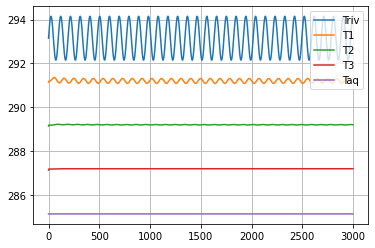

In [54]:
# les sorties des différents capteurs après passage dans le modèle direct
nt = 3000
nini = 0
nfin =3000
plt.plot(emu_observ_test_user1._T_riv[nini:nfin], label="Triv")
n_sens = len(emu_observ_test_user1._T_Shaft[0])
for i in range(n_sens-1):
    plt.plot(emu_observ_test_user1._T_Shaft[nini:nfin,i], label="T{}".format(i+1))
plt.plot(emu_observ_test_user1._T_Shaft[nini:nfin,n_sens-1], label="Taq")
plt.legend()
plt.grid()

# la valeur moyenne diminue (ce qui ne devrait pas arriver)

Text(0.5, 0, 't')

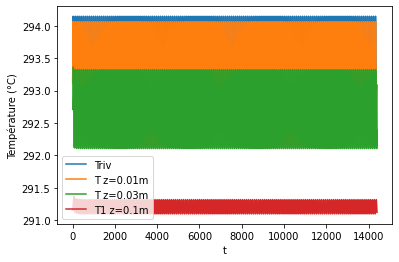

In [55]:
plt.plot(emu_observ_test_user1._T_riv, label="Triv")
plt.plot(col._temps[0,:], label="T z=0.01m")
plt.plot(col._temps[5,:], label="T z=0.03m")
plt.plot(emu_observ_test_user1._T_Shaft[:,0], label="T1 z=0.1m")
plt.legend()
plt.ylabel("Température (°C)")
plt.xlabel("t")

# commentaire : quelle est cette période supplémentaire ? effet non linéaire numérique ?

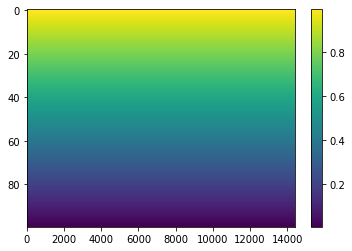

In [56]:
im = plt.imshow(col._H_res, aspect="auto")
plt.colorbar(im)

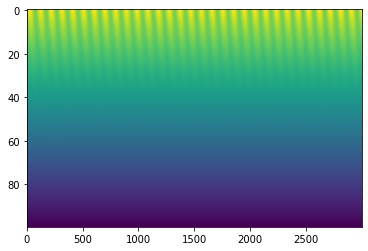

In [57]:
plt.imshow(col._temps[:,:3000], aspect='auto')
# on voit bien le déphasage mais a encore cette modulation

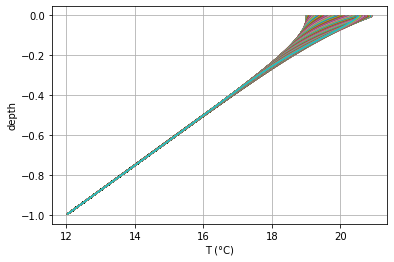

In [65]:
nt = len(col._temps[0,:])
for i in range(1000):
    plt.plot(col._temps[:,i]-K_offset, -col._z_solve)
plt.ylabel("depth")
plt.xlabel("T (°C)")
plt.grid()
#plt.xlim(282,286)

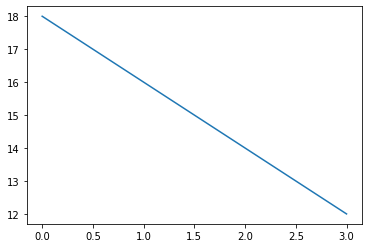

In [59]:
plt.plot(emu_observ_test_user1._T_Shaft[0]-K_offset)

In [60]:
emu_observ_test_user1._T_Shaft_measures

[(datetime.datetime(2010, 1, 1, 0, 0),
  array([291.15, 289.15, 287.15, 285.15])),
 (datetime.datetime(2010, 1, 1, 0, 15),
  array([291.19006348, 289.19006348, 287.19006348, 285.15      ])),
 (datetime.datetime(2010, 1, 1, 0, 30),
  array([291.19012451, 289.19012451, 287.19009399, 285.15      ])),
 (datetime.datetime(2010, 1, 1, 0, 45),
  array([291.19021606, 289.19021606, 287.19015503, 285.15      ])),
 (datetime.datetime(2010, 1, 1, 1, 0),
  array([291.19024658, 289.19024658, 287.19024658, 285.15      ])),
 (datetime.datetime(2010, 1, 1, 1, 15),
  array([291.19033813, 289.19033813, 287.19030762, 285.15      ])),
 (datetime.datetime(2010, 1, 1, 1, 30),
  array([291.19049072, 289.19042969, 287.19033813, 285.15      ])),
 (datetime.datetime(2010, 1, 1, 1, 45),
  array([291.19061279, 289.19049072, 287.19039917, 285.15      ])),
 (datetime.datetime(2010, 1, 1, 2, 0),
  array([291.19082642, 289.19052124, 287.19049072, 285.15      ])),
 (datetime.datetime(2010, 1, 1, 2, 15),
  array([291.19

Text(0.5, 0, 'H (m)')

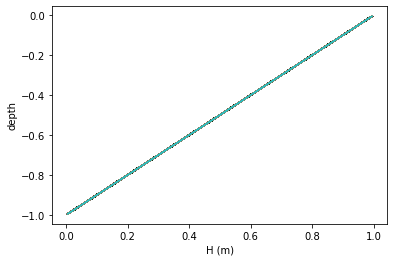

In [61]:
nt = len(col._H_res[0,:])
for i in range(1000):
    plt.plot(col._H_res[:,i], -col._z_solve)
plt.ylabel("depth")
plt.xlabel("H (m)")

In [62]:
col._temps[:,0]-K_offset

array([19.959991, 19.880005, 19.800018, 19.720001, 19.640015, 19.559998,
       19.480011, 19.399994, 19.320007, 19.24002 , 19.160004, 19.080017,
       19.      , 18.920013, 18.839996, 18.76001 , 18.679993, 18.600006,
       18.52002 , 18.440002, 18.360016, 18.279999, 18.200012, 18.119995,
       18.040009, 17.959991, 17.880005, 17.800018, 17.720001, 17.640015,
       17.559998, 17.480011, 17.399994, 17.320007, 17.24002 , 17.160004,
       17.080017, 17.      , 16.920013, 16.839996, 16.76001 , 16.679993,
       16.600006, 16.52002 , 16.440002, 16.360016, 16.279999, 16.200012,
       16.119995, 16.040009, 15.959991, 15.880005, 15.800018, 15.720001,
       15.640015, 15.559998, 15.480011, 15.399994, 15.320007, 15.240021,
       15.160004, 15.080017, 15.      , 14.920013, 14.839996, 14.76001 ,
       14.679993, 14.600006, 14.52002 , 14.440002, 14.360016, 14.279999,
       14.200012, 14.119995, 14.040009, 13.959991, 13.880005, 13.800018,
       13.720001, 13.640015, 13.559998, 13.480011, 

## 2. Cas avec perturbation des observations

In [63]:
t_debut = (2011, 8, 1)
t_fin = (2011, 8, 31, 23, 59, 59)
dt = 15*60 # pas de temps en (s)

T_riv_amp = 4
T_riv_offset = 16
P_T_riv = 72*4*dt

T_aq_amp = 0
T_aq_offset = 14
P_T_aq = 9999 # à mettre dans le init

dH_amp = 0.1
dH_offset = 0
P_dh = 14*24*4*dt

In [64]:
time_series_dict_user2 = {
	"param_time_dates": [t_debut, t_fin, dt], 
    "param_dH_signal": [dH_amp, P_dh, dH_offset], #En vrai y aura une 4e valeur ici mais ca prendra en charge pareil
	"param_T_riv_signal": [T_riv_amp, P_T_riv, T_riv_offset],
    "param_T_aq_signal": [T_aq_amp, P_T_aq, T_aq_offset],
    "sigma_meas_P": 0.05,
    "sigma_meas_T": 0.1, #float
}

emu_observ_test_user2 = Time_series.from_dict(time_series_dict_user2)

TypeError: Time_series.__init__() missing 2 required positional arguments: 'offset' and 'depth_sensors'

In [ ]:
emu_observ_test_user2._generate_perturb_T_riv_dH_series()
emu_observ_test_user2._generate_perturb_Shaft_Temp_series()

In [ ]:
emu_observ_test_user2._dates

array([datetime.datetime(2011, 8, 1, 0, 0),
       datetime.datetime(2011, 8, 1, 0, 15),
       datetime.datetime(2011, 8, 1, 0, 30), ...,
       datetime.datetime(2011, 8, 31, 23, 15),
       datetime.datetime(2011, 8, 31, 23, 30),
       datetime.datetime(2011, 8, 31, 23, 45)], dtype=object)

In [ ]:
emu_observ_test_user2._T_riv_dH_measures

In [ ]:
# l'utilisateur génère un dictionnaire avec les données importantes de la colonne
name ="Couche en sable"
zLow = 0.4
moinslog10K = 3
n = 0.1
lambda_s = 2 
rhos_cs = 4e6

# on utilise les mesures générées précédemment
col_dict2 = {
	"river_bed": 1., 
    "depth_sensors": [.1, .2, .3, .4], #En vrai y aura une 4e valeur ici mais ca prendra en charge pareil
	"offset": .0,
    "dH_measures": emu_observ_test_user2._T_riv_dH_measures,
    "T_measures": emu_observ_test_user2._T_Shaft_measures,
    "sigma_meas_P": emu_observ_test_user2._sigma_P, #float
    "sigma_meas_T": emu_observ_test_user2._sigma_T, #float
}

col2 = Column.from_dict(col_dict2)

# modèle une couche
layers_list2= layersListCreator([(name, zLow, moinslog10K, n, lambda_s, rhos_cs)])

TypeError: 'NoneType' object is not iterable

In [ ]:
nb_cells = 100
emu_observ_test_user1._measures_column_one_layer(col2, layers_list2, nb_cells)

In [ ]:
emu_observ_test_user2._generate_perturb_Shaft_Temp_series()
emu_observ_test_user2._generate_perturb_T_riv_dH_series()

array([[1.39212405e+01, 1.40703439e+01, 1.40708034e+01, 1.40333683e+01],
       [9.59595061e+05, 9.59594695e+05, 9.59595015e+05, 1.40978806e+01],
       [9.59595053e+05, 9.59595022e+05, 9.59595007e+05, 1.38918249e+01],
       ...,
       [9.59594930e+05, 9.59595155e+05, 9.59595013e+05, 1.39045025e+01],
       [9.59594932e+05, 9.59594873e+05, 9.59595017e+05, 1.41433880e+01],
       [9.59594883e+05, 9.59594904e+05, 9.59595077e+05, 1.41267418e+01]])

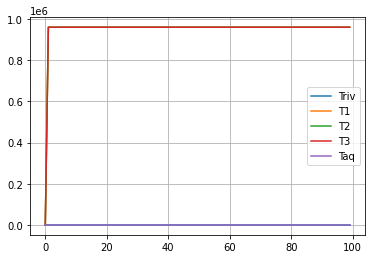

In [ ]:
# les sorties des différents capteurs après passage dans le modèle direct
nt = 100
plt.plot(emu_observ_test_user2._T_riv[:nt], label="Triv")
n_sens = len(emu_observ_test_user2._T_Shaft[0])
for i in range(n_sens-1):
    plt.plot(emu_observ_test_user2._T_Shaft[:nt,i], label="T{}".format(i+1))
plt.plot(emu_observ_test_user2._T_Shaft[:nt,n_sens-1], label="Taq")
plt.legend()
plt.grid()

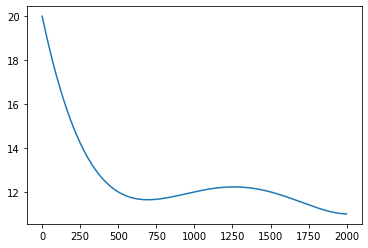

In [ ]:
plt.plot(col.get_temps_solve()[:,0]-K_offset)

# Test valeur par défaut de la classe émulation

In [ ]:
emu_observ_test_DEFAULT = Time_series()

In [ ]:
emu_observ_test_DEFAULT._generate_Shaft_Temp_series()
emu_observ_test_DEFAULT._T_Shaft_measures

TypeError: Time_series._generate_Shaft_Temp_series() missing 1 required positional argument: 'column'

In [ ]:
col._T_measures[0]

array([291.15, 289.15, 287.15])